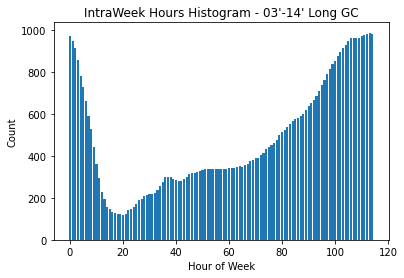

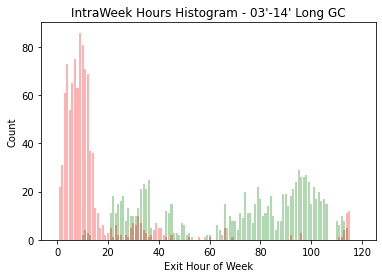

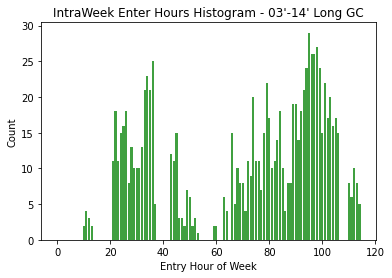

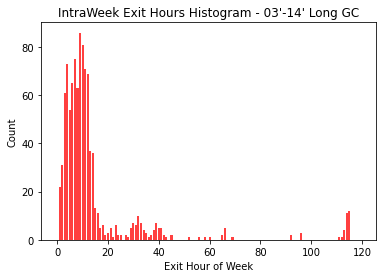

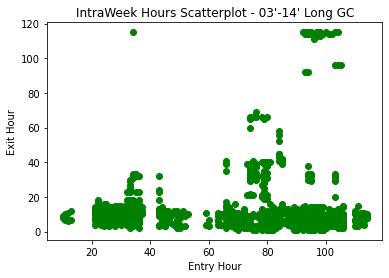

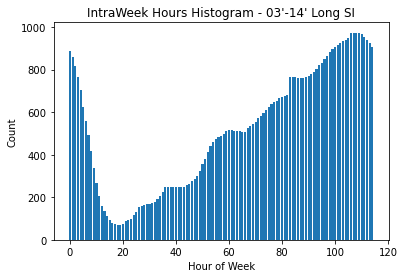

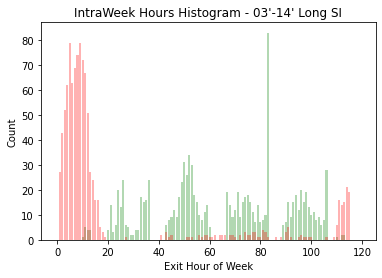

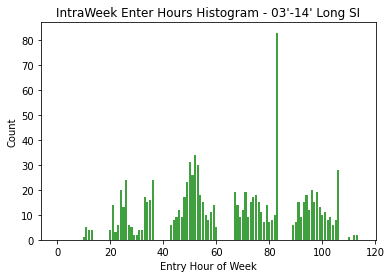

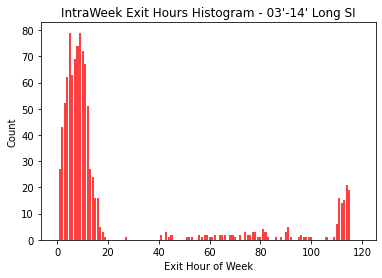

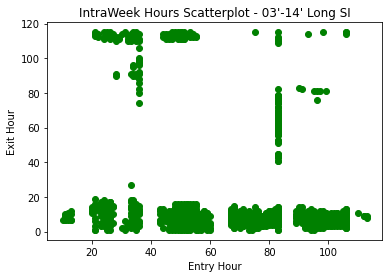

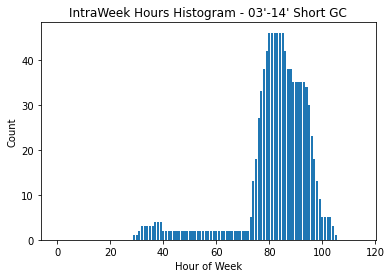

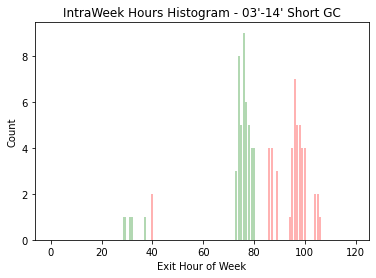

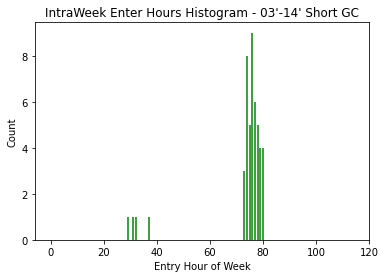

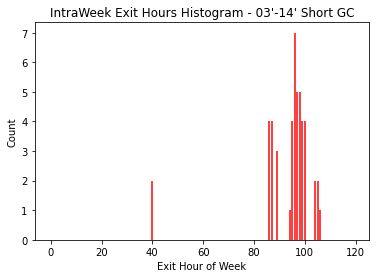

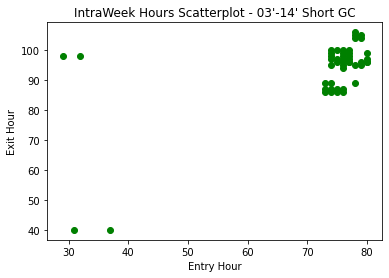

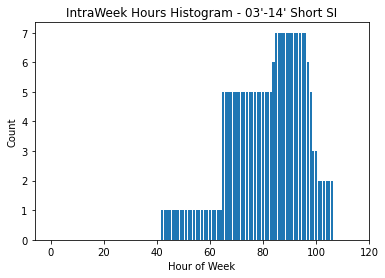

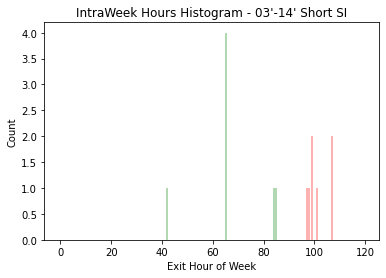

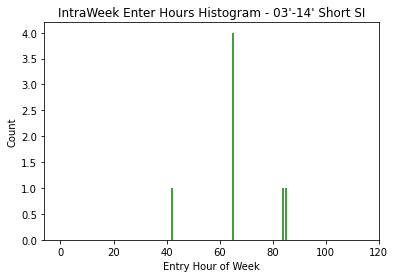

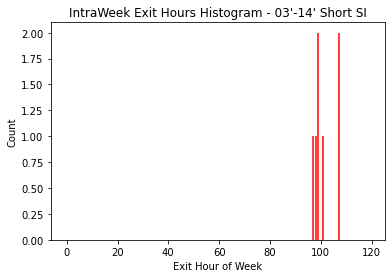

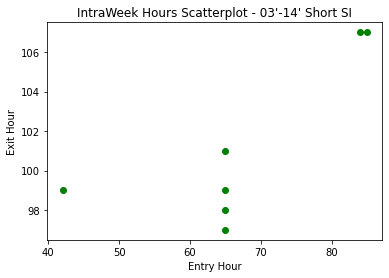

In [1]:
# to interacte  with plot
#%matplotlib widget

import os
import glob
import zipfile
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

#d = {'col1': [0, 1, 2, 3], 'col2': pd.Series([2, 3], index=[2, 3])}

#df1 = {'HourEnter': [0] * 115}, {'HourExit': [0] * 115}
#pd.DataFrame(data=df1, index=[0, 1])

#df1 = pd.DataFrame({'HourEnter': [0] * 115}, {'HourExit': [0] * 115})

# extract the params from all .sqx file xml and add it to db
def getStrategiesParams(df, df3, df4, hourEnter, hourExit, path):
    for file in glob.glob(path + "*.sqx"):
        zf = zipfile.ZipFile(file, 'r')
        for name in zf.namelist():
            if name == "strategy_Portfolio.xml":
                f = zf.open(name)
                x = f.read().decode("utf-8")
                # extract parameter from selected line found in xml
                entry_line = str([line for line in x.split('\n') if '<Param key="#IntraWeekHour#" controlType="jspinnerVar"' in line])
                exit_line = str([line for line in x.split('\n') if '<Param key="#Number#" controlType="jspinner"' in line])
                # Get parameter
                entry = int(entry_line.split('>')[1].split('<')[0])
                exit = int(exit_line.split('>')[1].split('<')[0])
                
                df3.at[entry,'Count'] += 1
                
                exitHour = addParamtoArray(df, entry, exit)
                hourEnter.append(entry)
                hourExit.append(exitHour)
                #df1.at[entry,'HourEnter'] = df1.iloc[entry]['HourEnter'] + 1
                #df1.at[exitHour,'HourExit'] = df1.iloc[exitHour]['HourExit'] + 1
                #df1.at[entry,'HourEnter'] = df1.iloc[entry]['HourEnter'] + 1
                #df2.at[exitHour,'HourExit'] = df2.iloc[exitHour]['HourExit'] + 1
                #print(str(entry) + " " + str(exit) + " " + str(exitHour))
                
                try:
                    df4.at[exitHour,'Count'] += 1
                except:
                    print("PAIN: " + exitHour)
                
# add a parameter to the db and return exit hour         
def addParamtoArray(df, entry, exit):
    count = 0
    #loop from entry to exit
    while (count < exit):
        if entry == 115:
            entry = 0
        #add 1 entry to db
        df.at[entry,'Count'] = df.iloc[entry]['Count'] + 1
        count += 1
        entry += 1
    # set exit hour from looped entry
    exitHour = entry
    return exitHour
    
# main
def main():
    for subdir, dirs, files in os.walk("../data/SQX Seasonality Histogram/"):
        for dirc in dirs:
            df = pd.DataFrame({'Count': [0] * 115})
            hourEnter = []
            hourExit = []
            #df = pd.DataFrame({"Hour": np.arange(115, 'Count': [0] * 115)
            
            df1 = pd.DataFrame({'HourEnter': [0] * 115})
            df2 = pd.DataFrame({'HourExit': [0] * 115})
            df3 = pd.DataFrame({'Count': [0] * 115})
            df4 = pd.DataFrame({'Count': [0] * 120})
            
            getStrategiesParams(df, df3, df4, hourEnter, hourExit, os.path.join(subdir, dirc) + "/")
            
            
            
            """
            # print db
            #df.plot.bar()
            #plt.plot(df.index, df['Count'])
            plt.bar(df.index, df['Count'])
            plt.title('IntraWeek Hours Histogram - ' + dirc)
            plt.xlabel('Hour of Week')
            plt.ylabel('Count')
            #plt.show()
            
              #enter/exits
            plt.bar(df3.index, df3['Count'], alpha=0.75)
            plt.title('IntraWeek Hours Histogram - ' + dirc)
            plt.xlabel('Entry Hour of Week')
            plt.ylabel('Count')
            #plt.show()
            plt.bar(df4.index, df4['Count'], alpha=0.75)
            plt.title('IntraWeek Hours Histogram - ' + dirc)
            plt.xlabel('Exit Hour of Week')
            plt.ylabel('Count')
            plt.show()
            """
            
            
             # print db
            #df.plot.bar()
            #plt.plot(df.index, df['Count'])
            plt.bar(df.index, df['Count'])
            plt.title('IntraWeek Hours Histogram - ' + dirc)
            plt.xlabel('Hour of Week')
            plt.ylabel('Count')
            plt.show()
            
            
            # Initialise the subplot function using number of rows and columns
            '''figure, axis = plt.subplots(1, 2)
              #enter/exits
            plt.figure(figsize=(20,12))
            axis[0].bar(df3.index, df3['Count'], alpha=0.75, color='green')
            axis[0].set_title('IntraWeek Enter Hours Histogram - ' + dirc)
            axis[0].set_xlabel('Entry Hour of Week')
            axis[0].set_ylabel('Count')
            #plt.show()
            axis[1].bar(df4.index, df4['Count'], alpha=0.75, color='red')
            axis[1].set_title('IntraWeek Exit Hours Histogram - ' + dirc)
            axis[1].set_xlabel('Exit Hour of Week')
            axis[1].set_label('Count')
            plt.show()
            '''
            plt.bar(df3.index, df3['Count'], alpha=0.3, color='green')
            plt.bar(df4.index, df4['Count'], alpha=0.3, color='red')
            plt.title('IntraWeek Hours Histogram - ' + dirc)
            plt.xlabel('Enter/Exit Hour of Week')
            plt.ylabel('Count')
            plt.show()
            #second set
            plt.bar(df3.index, df3['Count'], alpha=0.75, color='green')
            plt.title('IntraWeek Enter Hours Histogram - ' + dirc)
            plt.xlabel('Entry Hour of Week')
            plt.ylabel('Count')
            plt.show()
            plt.bar(df4.index, df4['Count'], alpha=0.75, color='red')
            plt.title('IntraWeek Exit Hours Histogram - ' + dirc)
            plt.xlabel('Exit Hour of Week')
            plt.ylabel('Count')
            plt.show()
            
            
            
            
            
            plt.scatter(hourEnter, hourExit, color = 'green')
            plt.title('IntraWeek Hours Scatterplot - ' + dirc)
            plt.xlabel('Entry Hour')
            plt.ylabel('Exit Hour')
            plt.show()
            

            '''plt.hist(hourEnter)
            plt.show()
            
            # Generate fake data
            x = np.random.normal(size=1000)
            y = x * 3 + np.random.normal(size=1000)
            #x = df1['HourEnter']
            #y = df2['HourExit']
            
            # Calculate the point density
            xy = np.vstack([x,y])
            z = gaussian_kde(xy)(xy)
            
            # Sort the points by density, so that the densest points are plotted last
            idx = z.argsort()
            x, y, z = x[idx], y[idx], z[idx]

            fig, ax = plt.subplots()
            ax.scatter(x, y, c=z, s=100)
            plt.show()'''


main()

In [ ]:
main()

In [ ]:
# creating random dataset
xs = [2, 3, 4, 5, 1, 6, 2, 1, 7, 2]
ys = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
zs = np.zeros(10)
dx = np.ones(10)
dy = np.ones(10)
dz = [1, 2, 3, 4, 5, 6, 7, 8, 19, 10]
  
# creating figure
figg = plt.figure()
ax = figg.add_subplot(111, projection='3d')
  
# creating the plot
plot_geeks = ax.bar3d(xs, ys, zs, dx, 
                      dy, dz, color='green')
  
# setting title and labels
ax.set_title("3D bar plot")
ax.set_xlabel('Hour Enter')
ax.set_ylabel('Hold Hours')
ax.set_zlabel('Count')
  
# displaying the plot
plt.show()